# Gradient Descent Intro
 <p>

In [2]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [1]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [7]:
n=30
x = random(n)
y = lin(a,b,x)

In [8]:
x

array([ 0.3046,  0.918 ,  0.7925,  0.8476,  0.2508,  0.3504,  0.8326,  0.6875,  0.4449,  0.4687,
        0.5901,  0.2757,  0.6629,  0.169 ,  0.8677,  0.6612,  0.112 ,  0.1669,  0.6226,  0.6174,
        0.3871,  0.4724,  0.3242,  0.7871,  0.0157,  0.8589,  0.7008,  0.2942,  0.3166,  0.5847])

In [9]:
y

array([  8.9138,  10.7541,  10.3775,  10.5428,   8.7525,   9.0511,  10.4977,  10.0626,   9.3347,
         9.4062,   9.7704,   8.827 ,   9.9888,   8.507 ,  10.603 ,   9.9836,   8.336 ,   8.5006,
         9.8678,   9.8523,   9.1614,   9.4172,   8.9725,  10.3614,   8.0471,  10.5766,  10.1025,
         8.8827,   8.9497,   9.7542])

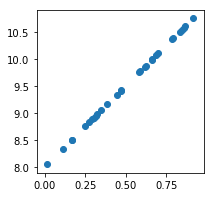

In [10]:
plt.scatter(x,y)

In [11]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [12]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1074

In [13]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [14]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [15]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani